# TP Final MPC 
## Par Roberto CHACON et Manh-Huan NGUYEN

### **Description du dataset**

L'objectif du projet est de prédire le prix des maisons.

Le dataset contient 13397 maisons composées des 20 caractéristiques : 

- **id** - identifiant unique d'une maison
- **pricePrice** - la variable cible à predire
- **bedroomsNumber** - nb des chambres
- **bathroomsNumber** - nb des salles de bain
- **sqft_livingsquare** - métrage de la maison
- **sqft_lotsquare** - métrage du lot
- **floorsTotal** - nb d'étages de la maison
- **waterfront** - vue sur le bord de la mer
- **view** - Indice de 0 à 4 de la qualité de la vue de la propriété
- **condition** - Qualité moyenne de la condition
- **grade** - note globale attribué au logement (sur la base du système de notation de King County)
- **sqft_above** - Métrage de la maison hors sous-sol
- **sqft_basement** - Métrage du sous-sol
- **yr_built** - Année de construction
- **yr_renovated** - Année de rénovation
- **zipcode** - Code postal
- **lat** - Coordonnées de latitude
- **long** - Coordonnées de longitude
- **sqft_living15** - La superficie de l'espace intérieur du logement pour les 15 voisins les plus proches.
- **sqft_lot15** - La superficie des terrains des 15 voisins les plus proches.
 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [2]:
# Load the data
houses = pd.read_csv('houses.csv', index_col=0)  # we define the first column of the datafile to be used to index the rows
houses

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6681,3.500,3,2.25,1860,8378,2.0,0.0,0.0,3,7,1860,0,1995,0.0,98038,47.3875,-122.032,1870,8378
17798,5.925,4,3.00,2170,8240,1.0,0.0,0.0,4,8,1370,800,1968,0.0,98052,47.6291,-122.093,2020,7944
18854,2.555,2,1.00,1440,43560,1.0,0.0,0.0,4,7,1150,290,1965,0.0,98027,47.4916,-122.082,1870,56628
13478,13.300,4,2.25,3260,4640,2.0,0.0,0.0,5,9,2360,900,1907,0.0,98112,47.6272,-122.312,3240,5800
10509,3.891,2,1.00,840,5400,1.0,0.0,0.0,4,7,840,0,1948,0.0,98118,47.5489,-122.271,1340,5400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16125,2.900,2,1.00,930,7740,1.0,0.0,0.0,3,6,930,0,1924,0.0,98125,47.7091,-122.292,1250,7740
19004,3.150,3,2.50,1730,6368,2.0,0.0,0.0,3,7,1730,0,1993,0.0,98038,47.3505,-122.032,1780,6597
9094,6.850,3,2.50,3450,8000,3.0,0.0,0.0,4,8,2970,480,1927,1975.0,98116,47.5605,-122.402,1880,6135
3537,3.260,6,1.50,1930,8400,1.0,0.0,0.0,3,7,1030,900,1971,0.0,98146,47.4869,-122.340,1780,9520


### **Regression simple**

L'objectif de cette partie est de trouver la meilleure variable pour prédire les prix des maisons.
Nous allons donc nous intéresser sur 3 critères : 
1. Le coefficient de détermination $R^2$.
2. La quantité d'information non expliquée par le modèle $I_r$.
3. L'erreur de generalisation.

**La meilleure variable avec le $R^2$ plus élevé et le $I_r$ le plus faible**


In [3]:
r_squared = 0
i_r = 0
i_t = 0
for x in houses.columns[1:] : 
    X = houses[x]   # On selectionne la colonne contenant la variable prédictive
    X = sm.add_constant(X)  # On ajoute une colonne constante pour beta_0
    Y = houses['price']  # On selectionne la variable cible
    model = sm.OLS(Y,X).fit() # On ajuste le modèle pour prédire Y à l'aide de X
    if model.rsquared > r_squared : 
        r_squared = model.rsquared
        i_r = np.sum(model.resid)
        i_t = np.sum((houses['price'] - np.mean(houses['price']))**2)
        m = model
        x_best = x

print(f"R^2 = {r_squared}")
print(f"I_r = {i_r}")
print(f"I_t = {i_t}")
print(f"Meilleure variable = {x_best}") # La meilleure variable pour predire le prix -> sqft_living
m.summary() # Le modèle

R^2 = 0.49640102806105757
I_r = -2.376054908381775e-11
I_t = 186163.56522629363
Meilleure variable = sqft_living


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 1.320e+04
Date:                Fri, 28 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:44:03   Log-Likelihood:                -32042.
No. Observations:               13397   AIC:                         6.409e+04
Df Residuals:                   13395   BIC:                         6.410e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.5466      0.057     -9.646      0.000      -0.658      -0.436
sqft_living     0.0029   2.49e-05    114.907      0.000       0.003       0.003
==============================================================================
Omnibus:                     9718.781   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           441688.826
Skew:                           2.993   Prob(JB):                         0.00
Kurtosis:                      30.485   Cond. No.                     5.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


On visualise la relation entre le sqft_living (x) et le prix (y).

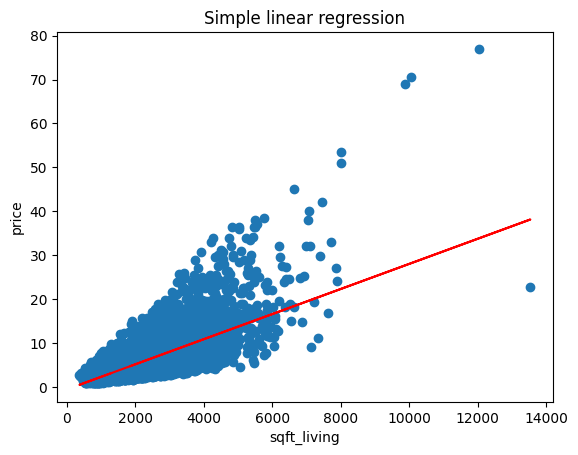

In [4]:
plt.scatter(houses['sqft_living'], houses['price'])
plt.title("Simple linear regression")
y_pred = m.fittedvalues
plt.plot(houses['sqft_living'],y_pred, color ="red")
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.show()

Le graph montre une corrélation significative entre le sqft_living et le prix, ce qui confirme que sqft_living est la meilleure variable pour une régression simple pour prédire le prix des maisons.

**Erreur de généralisation**

Pour obtenir l'erreur de généralisation, nous allons utiliser la méthode de *Train/Test Split* à l'aide de la librarie sklearn.

In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(houses, test_size= 0.25, random_state=20) # Notre test set sera le 25% des données.

In [6]:
print(train.shape, test.shape)  # On confirme la bonne distribution des données (75%, 25%)

(10047, 19) (3350, 19)


Pour faciliter les tests, on utilisera les fonctions implementées en TP pour : 
- Calculer un modèle de regression sur un dataset.
- Calculer une prédiction en fonction d'un modèle.
- Estimer l'erreur de généralisation par la méthode train / test split.

In [7]:
def my_regression(data,idx_p,idx_t) :
    """
    Crée un modèle de regression sur un dataset.
    :param data: Le dataset.
    :param idx_p: Index de la variable predictive.
    :param idx_t: Index de la variable à predire.
    """
    X = data.iloc[:,idx_p]
    X = sm.add_constant(X)
    Y = data.iloc[:,idx_t]
    model = sm.OLS(Y,X).fit()
    return model


In [8]:
def my_prediction(my_model,data) :
    """
    Calcule une prédiction sur un dataset en fonction d'un modèle de regression.
    :param my_model: Le modèle de regression.
    :param data: Le dataset.
    """
    X_names = my_model.model.exog_names[1:]
    X_new = data[X_names]
    X_new = sm.add_constant(X_new)
    pred=my_model.predict(X_new)
    return pred

In [9]:
def generalization_error_split(train,test, idx_p, idx_t) :
    """ 
    Calcule l'erreur de généralisation par la méthode train/test split.
    :param train: train set
    :param test: test set
    :param idx_p: variable predictive
    :param idx_t: variable à predire
    """ 
    print()
    my_model= my_regression(train,idx_p,idx_t)
    pred=my_prediction(my_model,test)
    truth = test.iloc[:,idx_t]
    MSE=np.mean((pred-truth)**2)
    print(MSE)
    return MSE

In [10]:
MSE = generalization_error_split(train,test,houses.columns.get_loc('sqft_living'),houses.columns.get_loc('price'))



7.001875041181125


### **Regression multiple**

Afin d'effectuer une regression multiple, on utilisera de la même manière qu'avant la fonction OLS, sauf que cette fois ci on mettra les 18 variables du dataset comme input pour predire le prix.

Étant donné que nous avons implementé les fonctions realisées en TP, il nous suffira de les appeler pour construire notre modèle.

In [11]:
multiple_model = my_regression(houses, range(1,18), 0)
multiple_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     1820.
Date:                Fri, 28 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:44:04   Log-Likelihood:                -28615.
No. Observations:               13397   AIC:                         5.727e+04
Df Residuals:                   13379   BIC:                         5.740e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            39.0084     38.002      1.026      0.305     -35.481     113.497
bedrooms         -0.3653      0.024    -15.152      0.000      -0.413      -0.318
bathrooms         0.4653      0.042     11.002      0.000       0.382       0.548
sqft_living       0.0016      0.000      7.457      0.000       0.001       0.002
sqft_lot      -7.137e-07   4.69e-07     -1.522      0.128   -1.63e-06    2.06e-07
floors            0.0513      0.046      1.104      0.270      -0.040       0.142
waterfront        6.4301      0.235     27.418      0.000       5.970       6.890
view              0.5149      0.028     18.426      0.000       0.460       0.570
condition         0.2507      0.030      8.234      0.000       0.191       0.310
grade             0.9291      0.028     33.248      0.000       0.874       0.984
sqft_above        0.0004      0.000      1.731      0.083    -4.8e-05       0.001
sqft_basement  -3.91e-05      0.000     -0.190      0.850      -0.000       0.000
yr_built         -0.0274      0.001    -29.280      0.000      -0.029      -0.026
yr_renovated      0.0002   4.74e-05      3.714      0.000    8.32e-05       0.000
zipcode          -0.0057      0.000    -13.222      0.000      -0.006      -0.005
lat               6.0461      0.139     43.648      0.000       5.775       6.318
long             -2.2551      0.170    -13.289      0.000      -2.588      -1.922
sqft_living15     0.0002    4.5e-05      3.541      0.000    7.11e-05       0.000
==============================================================================
Omnibus:                    11934.573   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1421082.094
Skew:                           3.793   Prob(JB):                         0.00
Kurtosis:                      52.882   Cond. No.                     2.14e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# On obtient les train et test sets
train , test = train_test_split(houses, test_size = 0.30, random_state=20)

# On calcule le MSE
MSE = generalization_error_split(train, test, range(1,18), 0)


4.448779409174057


On peut remarquer que le modèle à 18 variables a un MSE plus petit (MSE = 4.44) que celui d'une variable (MSE = 7.001). 
Donc il est clairement plus intéressant.

### **Sélection des variables**

Cette partie consiste à trouver le meilleur sous-ensemble de variables parmi les variables predictives ($X_1,X_{18}$) qui conduisent au meilleur modèle.

Il existe plusieurs procédures, mais on se centrera sur (En utilisant l'erreur de généralisation comme critère de performance) :
- La Recherche Exhaustive.
- La Recherche en avant (Forward Search).
- La Recherche en arrière (Backward Search).




**Forward Search**

L'idée de la recherche en avant est de partir d'un ensemble vide de variables prédictives, et on itère en ajoutant une à une les variables qui minimisent l'erreur de généralisation (dans notre cas). Le processus continue jusqu'à ce qu'on atteighne un point où l'ajout de variables supplémentaires n'améliore plus le MSE.

In [13]:
def forward_selection(train, idx_p, idx_t):
    """
    Implémente l'algorithme de sélection de variable en avant (forward selection) en utilisant l'erreur de généralisation comme critère de performance
    :param train: Le training set.
    :param idx_p: Indexes des variables prédictives.
    :param idx_t: Index de variable cible.
    :return best_variable: La meilleure variable trouvée 
    """
    
    # D'abord on split le training set en train et test set
    train_set, test_set = train_test_split(train, test_size=0.25, random_state=0)
    
    selected_vars = []
    available_vars = np.array(idx_p)

    best_var = -1
    best_mse = float('inf')
    

    while len(available_vars) > 0:
        
        var_changed = False
        
        # Boucle sur les variables disponibles pour trouver la meilleure variable à ajouter
        for var in available_vars:
            
            current_vars = np.append(selected_vars, var)

            # On évalue le MSE en utilisant les variables sélectiionnées jusqu'à l'itération courante
            current_mse = generalization_error_split(train,train_set, current_vars, idx_t)

            # Si le MSE est amélioré, on maj la variable temporaire
            if current_mse < best_mse : 
                best_var = var
                best_mse = current_mse
                var_changed = True
    
        # Si aucune varibale n'a amélioré le MSE, on sort de la boucle
        if not var_changed:
            break

        selected_vars = np.append(selected_vars, best_var)



    return best_var, best_mse


In [14]:
# On obtient les train et test sets
train , test = train_test_split(houses, test_size = 0.30, random_state=20)

best_var, best_mse = forward_selection(train, range(1,18), 0)

print("La meilleure variable est : "+houses.columns[best_var]+"("+str(best_var)+") avec un MSE de : "+str(best_mse))


12.951587250280767

10.094620077624457

7.041470862661589

14.017712628397174

13.217782131018302

13.10361854828772

11.983062254786182

14.097895771585033

7.799913915773282

8.915450817933419

12.62576131800506

14.078179252550107

13.979725814137577

14.089881675897187

12.786335225134868

14.112195102260957

9.261053761812608

6.83859671561452

7.041436863966776

7.041470862661589

7.020192581371728

7.041460115863907

6.518781358757276

6.4609418991897725

6.966642360844225

6.475590194928873

7.031550426344114

7.030810815598455

6.610873727415732

6.964985221095285

6.917159373542336

6.036858754593451

6.714690842324299

6.972103484149129

5.875699251457948

6.036509143960888

6.036858754593441

6.035520063532472

6.03679719752093

5.4840116767882074

5.449304459690337

5.950174045911114

5.641149941209308

6.0374470261251405

6.037581626862971

5.784903307675559

5.9734868538717025

6.031754601072476

6.036858754602262

5.860810922747679

5.9752195221685875

5.34664359701654

On peut remarquer que la meilleure variable trouvé est waterfront (index 6) avec un MSE de 4.2178.

**Backward Search**

Le principe de la recherche en arrière est le même que celui de la recherche en avant, sauf que cette fois-ci on commence avec un ensemble complet de variables prédictives et on itère en supprimant une à une, jusqu'à ce qu'on atteigne un point où la suppression de variables n'améliore plus le MSE.

In [15]:
def backward_selection(train, idx_p, idx_t):
    """
    Implémente l'algorithme de sélection de variable en arrière (backward search) en utilisant l'erreur de généralisation comme critère de performance
    :param train: Le training set.
    :param idx_p: Indexes des variables prédictives.
    :param idx_t: Index de variable cible.
    :return best_variable: La meilleure variable trouvée 
    """

    # D'abord on split le training set en train et test set
    train_set, test_set = train_test_split(train, test_size=0.25, random_state=0)

    # On commence par selectionner toutes les variables
    selected_vars = np.array(idx_p)

    removed_vars = []

    best_var = -1
    best_mse = float('inf')

    while len(selected_vars) > 0:

        var_changed = False

        for var in selected_vars:

            current_vars = np.delete(selected_vars, np.where(selected_vars == var))

            # On evalue le MSE
            current_mse = generalization_error_split(train, train_set, current_vars, idx_t)

            if current_mse < best_mse:
                best_var = var
                best_mse = current_mse
                var_changed = True
            
        
        if not var_changed:
            break

        # On enleve la meilleure variable du selected vars et on l'ajout a la liste des vars supprimees
        selected_vars = np.delete(selected_vars, np.where(selected_vars == best_var))
        

    # On renvoie la dernieree variable supprimee (qui est la meilleure)
    return best_var, best_mse


In [16]:
# On obtient les train et test sets
train , test = train_test_split(houses, test_size = 0.30, random_state=20)

best_var, best_mse = backward_selection(train, range(1,18), 0)

print("La meilleure variable est : "+houses.columns[best_var]+"("+str(best_var)+") avec un MSE de : "+str(best_mse))


4.2812315800851115

4.260350936485808

4.238333771531307

4.219074484161112

4.219997711508929

4.457370209919231

4.328891953465509

4.238980883658211

4.609740108780275

4.217964582370451

4.217840151253607

4.4826081924875405

4.21987478601242

4.2705349239865935

4.79548554212836

4.267821655430323

4.221259276877523

4.281159681228139

4.260218693440044

4.486339637291695

4.21892246682546

4.219850471998883

4.457291243312857

4.328713160681686

4.238960658704083

4.60942116860044

4.219060804595446

4.4824045533547

4.219741745053001

4.270407455663686

4.7953368576273165

4.267674840863281

4.221094010103932
La meilleure variable est : sqft_basement(11) avec un MSE de : 4.217840151253607


On constate que la meilleure variable trouvée avec le backward search est le sqft_basement (d'index 11) avec un MSE de 4.21.

**Recherche exhaustive**

La recherche exhaustive prend en compte toutes les combinaisons possibles de variables prédictives et selectionne celle qui donne les meilleures performances.

Pour cette implémentation, on se servira de la librarie *itertools.combinations* pour générer toutes les combinaisons de variables possibles.  

In [17]:
import itertools

In [18]:
def exhaustive_search(train, idx_p, idx_t):
    """
    Implémente l'algorithme de sélection de variable par recherche exhaustive en utilisant l'erreur de généralisation comme critère de performance
    :param train: Le training set.
    :param idx_p: Indexes des variables prédictives.
    :param idx_t: Index de variable cible.
    :return best_variable: La meilleure variable trouvée 
    """

    # D'abord on split le training set en train et test set
    train_set, test_set = train_test_split(train, test_size=0.25, random_state=0)

    selected_vars = []
    available_vars = np.array(idx_p)

    best_mse = float('inf')
    best_var = -1

    for i in range(len(available_vars)):
        for var in itertools.combinations(available_vars, i+1):
            
            current_vars = list(var)

            # On évalue le MSE en utilisant les variables sélectiionnées jusqu'à l'itération courante
            current_mse = generalization_error_split(train,train_set, current_vars, idx_t)

            # Si le MSE est amélioré, on maj la variable temporaire
            if current_mse < best_mse : 
                best_var = var
                best_mse = current_mse
            

    return best_mse,best_var


Par contre, vu que cette méthode évalue toutes les combinaisons possibles, elle est coûteuse en temps, donc le test ci dessous est commenté pour ne pas bloquer les autres tests.


In [19]:
"""
# On obtient les train et test sets
train , test = train_test_split(houses, test_size = 0.30, random_state=20)

best_var = exhaustive_search(train, range(1,18), 0)

print("La meilleure variable est : "+houses.columns[best_var]+"("+str(best_var)+")")
"""

'\n# On obtient les train et test sets\ntrain , test = train_test_split(houses, test_size = 0.30, random_state=20)\n\nbest_var = exhaustive_search(train, range(1,18), 0)\n\nprint("La meilleure variable est : "+houses.columns[best_var]+"("+str(best_var)+")")\n'

### **Modèles non-lineaires**

Les modèles non linéaires permettent de modéliser des données plus complexes et ont tendance à être plus précis, mais aussi à être plus difficiles à interpréter que les modèles linéaires.

Dans ce TP, nous allons implémenter la technique vue en TP : 

In [20]:
def add_polynomial_feature(data, idx_p, power):
    """
    Ajoute des variables polynomiales à un dataset donné.

    :param data: Le dataset considéré (train, test ou autre)
    :param idx_p: La liste des indexes de colonne dans data pour lesquels vous voulez ajouter des variables polynomiales
    :param power: La liste des puissances que vous voulez utiliser pour les variables dans idx_p
    :return: Un nouveau dataset avec les variables polynomiales ajoutées.
    """
    new_data = data.copy(deep = True)
    for i in range(0, len(idx_p)):
        for j in power:
            for k in range(2, j+1):
                new_data['{}_pow_{}'.format(new_data.columns[idx_p[i]],k)] = new_data.iloc[:,idx_p[i]]**k
    return(new_data)

Ensuite nous allons chercher le meilleur degré pour notre modèle en comparant les MSE pour chaque degré : 

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# On obtient les train et test sets
train, test = train_test_split(houses, test_size=0.3, random_state=20)

# Index des colonnes à considérer
idx_p = range(1,18)

best_mse = float('inf')
best_degree = 0

best_model = LinearRegression()


# On boucle sur les degrés de polynômes pour trouver le meilleur degre
for degree in range(1, 11):

    # Ajout des variables polynomiales au train set
    train_poly = add_polynomial_feature(train, idx_p, [degree])
    
    # On obtient le modele de regression 
    X_train = train_poly.drop(columns=["price"])
    Y_train = train_poly[["price"]]
    model = LinearRegression()
    model.fit(X_train, Y_train)
    
    # On ajout les variables polynomiales au test set
    test_poly = add_polynomial_feature(test, idx_p, [degree])
    
    # Prédiction sur le test set 
    X_test = test_poly.drop(columns=["price"])
    y_test = test_poly["price"]

    y_pred = model.predict(X_test)
    
    # Calcul du MSE
    mse = mean_squared_error(y_test, y_pred)
    
    # Mise à jour de la meilleure erreur
    if mse < best_mse:
        best_model = model
        best_mse = mse
        best_degree = degree

# Affichage du meilleur degré et de l'erreur correspondante
print(f"Meilleur degré : {best_degree}")
print(f"Meilleur MSE : {best_mse}")


Meilleur degré : 2
Meilleur MSE : 3.577486104959523


On peut voir que, en considèrant les 18 variables, le meilleur degré trouvé est le 2 avec un MSE de 3.57.

**Modèle pour Kaggle**

Après les tests ci dessus, on peut constater que le meilleur modèle est le non-linéaire, avec un MSE de 3.57. C'est pour cela que nous avons estimer les prédictions de house_competition à partir de ce modèle :

In [22]:
# Creation du fichier pour Kaggle
houses_competition = pd.read_csv('houses_competition.csv', index_col=0)  

houses_competition_poly = add_polynomial_feature(houses_competition, range(0,17), [2])

pred = best_model.predict(houses_competition_poly)
pred = pred.reshape(-1)

pred_df = pd.DataFrame({'ID': houses_competition_poly.index, 'Price' : pred})


pred_df.to_csv('my_submission.csv', index=False)


Score obtenue Kaggle : 

![image.png](./scoreKaggle.png)